### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 1

#### Дисциплина: Интеллектуальный анализ данных

##### Студент: Матюхин Григорий Васильевич
##### Группа: НПИбд-01-21

## Москва 2024
***

### Вариант №8

Breast Cancer Wisconsin (Diagnostic) Data Set http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

## 1. Скачиваем датасет

In [1]:
from ucimlrepo import fetch_ucirepo

breast_cancer_diagnostic = fetch_ucirepo(id=17)

In [2]:
df = breast_cancer_diagnostic.data.original

## 2. Определить числовые признаки

In [3]:
df.head()

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


Из названий признаков и видимых данных, можем определить,
что только `ID` и `Diagnosis` являются категориальными, а все остальные -- числовыми.

In [4]:
numerical = list(set(df) - set(["ID", "Diagnosis"]))

In [5]:
import numpy as np

In [6]:
df = df.replace('?', np.nan)
df[numerical].isnull().sum()

concave_points3       0
concavity1            0
perimeter3            0
smoothness1           0
radius1               0
symmetry2             0
symmetry3             0
concave_points1       0
compactness1          0
texture2              0
fractal_dimension2    0
area1                 0
compactness3          0
radius3               0
fractal_dimension1    0
area2                 0
texture3              0
perimeter1            0
radius2               0
texture1              0
compactness2          0
fractal_dimension3    0
smoothness2           0
area3                 0
symmetry1             0
perimeter2            0
concave_points2       0
concavity3            0
concavity2            0
smoothness3           0
dtype: int64

В датасете не пропущенных значений.

## 3. Метка класса и ее дискретизация

В данном датасете `Diagnosis` является меткой класса.

In [7]:
np.unique(df["Diagnosis"])

array(['B', 'M'], dtype=object)

Метка принимает только два значения -- дискретизация не нужна.  
Но необходимо заменить строчние значения на числовые. Пусть M (malignant, злокачественный) будет 1, а B (benign, доброкачественный) -- 0.

In [8]:
df["Diagnosis"] = df["Diagnosis"].replace("M", 1).replace("B", 0)
np.unique(df["Diagnosis"])

/tmp/ipykernel_1779589/3063741295.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Diagnosis"] = df["Diagnosis"].replace("M", 1).replace("B", 0)


array([0, 1])

## 4. Признаки с максимальной взмаимосвязью с меткой класса

In [9]:
import sklearn.feature_selection

In [10]:
klass = sklearn.feature_selection.SelectKBest(sklearn.feature_selection.f_classif, k=2)

In [11]:
klass.fit(df[numerical], df["Diagnosis"])

SelectKBest(k=2)

In [12]:
high_corr = klass.get_feature_names_out()
high_corr

array(['concave_points3', 'perimeter3'], dtype=object)

## 5. Матрица корреляции

In [13]:
corr_in = df[[*high_corr, "Diagnosis"]]
corr_mat = corr_in.corr()
corr_mat.style.background_gradient(cmap="Blues")

,concave_points3,perimeter3,Diagnosis
concave_points3,1.000000,0.816322,0.793566
perimeter3,0.816322,1.000000,0.782914
Diagnosis,0.793566,0.782914,1.000000


## 6. Визуализация данных

<Axes: title={'center': 'Классы для признаков с наибольшей коррелляцией'}, xlabel='concave_points3', ylabel='perimeter3'>

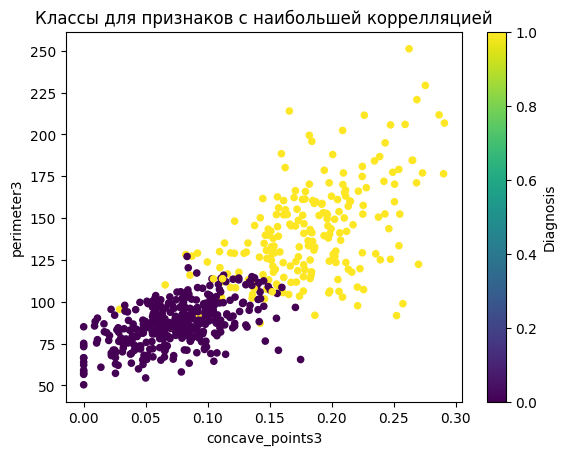

In [14]:
d = df[[*high_corr, "Diagnosis"]]
d.plot.scatter(high_corr[0], high_corr[1], c="Diagnosis", cmap="viridis", title="Классы для признаков с наибольшей коррелляцией")

## 7. Размерность метода главных компонент

In [15]:
from sklearn.decomposition import PCA

In [16]:
explained_ratio = 0
n = -1
while explained_ratio < 0.975:
    n += 1
    p = PCA(n_components=n)
    p.fit(df[numerical])
    explained_ratio = sum(p.explained_variance_ratio_)
    print(f"{n=} {explained_ratio=}")
print("необходимая размерность:", n)

n=0 explained_ratio=0
n=1 explained_ratio=np.float64(0.9820446715106621)
необходимая размерность: 1


## 8. Снижение размерности и визуализация

In [17]:
p = PCA(n_components=2)
coords = p.fit_transform(df[numerical])

In [18]:
coords

array([[1160.1425737 , -293.91754364],
       [1269.12244319,   15.63018184],
       [ 995.79388896,   39.15674324],
       ...,
       [ 314.50175618,   47.55352518],
       [1124.85811531,   34.12922497],
       [-771.52762188,  -88.64310636]])

In [19]:
import matplotlib.pyplot as pyplt

Text(0.5, 1.0, 'Набор данных с размерностью 2 признака')

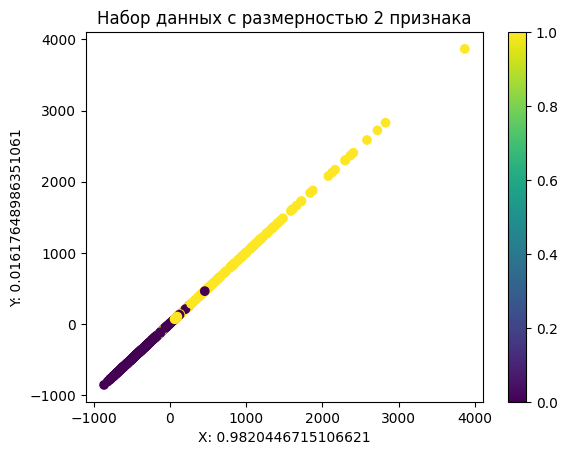

In [20]:
x = coords[:, 0]
y = coords[:, 0]
pyplt.scatter(x, y, c=df["Diagnosis"])
pyplt.colorbar()
pyplt.xlabel(f"X: {p.explained_variance_ratio_[0]}")
pyplt.ylabel(f"Y: {p.explained_variance_ratio_[1]}")
pyplt.title("Набор данных с размерностью 2 признака")